In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv('assets/datasets/Iowa_Liquor_sales_sample_10pct.csv')

## Data Exploration ##

## Data Cleaning ##

In [6]:
# Removing redundant columns
sales.drop('Volume Sold (Gallons)', axis = 1, inplace = True)

# Removing $ and convert to float
sales['State Bottle Cost'].replace('\$', '', regex = True, inplace = True)
sales['State Bottle Cost'] = sales['State Bottle Cost'].astype(float, copy = True)

sales['State Bottle Retail'].replace('\$', '', regex = True, inplace = True)
sales['State Bottle Retail'] = sales['State Bottle Retail'].astype(float, copy = True)

sales['Sale (Dollars)'].replace('\$', '', regex = True, inplace = True)
sales['Sale (Dollars)'] = sales['Sale (Dollars)'].astype(float, copy = True)

# Converting dates
sales['Date'] =  pd.to_datetime(sales['Date'], format = '%m/%d/%Y')

# Droping bad values
sales.dropna(axis = 0, how = 'any', inplace = True)

# Converting integers
sales['Category'] = sales['Category'].astype(int, copy = True)

sales.shape

(269258, 17)

# Part 1: A Story of the life of Q1 #

### Problem Statement: ###

Does a store's number of sales correlate to how long its been open?

In [ ]:
# # Determine which stores were open all of 2015
# # Find the first and last sales date.
# mask1 = sales.Date.dt.year == 2015

# first_sale_date = sales[mask1].groupby(['Store Number'])['Date'].min()
# last_sale_date = sales[mask1].groupby(['Store Number'])['Date'].max()
# # Filter out stores that opened or closed throughout the year
# # first_sale_date

# first_sale_df = pd.DataFrame(first_sale_date).reset_index()
# last_sale_df = pd.DataFrame(last_sale_date).reset_index()

# mask2 = [first_sale_df.Date[i].month == 1 for i in range(len(first_sale_df))]
# mask3 = [last_sale_df.Date[i].month == 12 for i in range(len(first_sale_df))]

# jan_stores = first_sale_df[mask2]['Store Number']
# dec_stores = last_sale_df[mask3]['Store Number']

# full_year_stores_mask = jan_stores.isin(dec_stores)
# full_year_stores = jan_stores[full_year_stores_mask]

# final_mask = sales['Store Number'].isin(full_year_stores)
# sales_full_year = sales[final_mask]

# # You may want to save this step until you start modelling

In [10]:
sales[sales['Store Number'] == 2106]['Sale (Dollars)'].sum()

176517.45000000013

In [11]:
sales['Category Name'].unique()

array(['APRICOT BRANDIES', 'BLENDED WHISKIES', 'STRAIGHT BOURBON WHISKIES',
       'AMERICAN COCKTAILS', 'VODKA 80 PROOF', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES', 'IMPORTED VODKA',
       'CINNAMON SCHNAPPS', 'SINGLE BARREL BOURBON WHISKIES',
       'PEPPERMINT SCHNAPPS', 'VODKA FLAVORED', '100 PROOF VODKA',
       'DISTILLED SPIRITS SPECIALTY', 'TEQUILA', 'TENNESSEE WHISKIES',
       'WHISKEY LIQUEUR', 'MISC. AMERICAN CORDIALS & LIQUEURS',
       'APPLE SCHNAPPS', 'CHERRY BRANDIES',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'IMPORTED DRY GINS',
       'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES', 'SINGLE MALT SCOTCH',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'SPICED RUM', 'CREAM LIQUEURS',
       'SCOTCH WHISKIES', 'IMPORTED VODKA - MISC', 'IRISH WHISKIES',
       'FLAVORED RUM', 'IMPORTED GRAPE BRANDIES', 'SPEARMINT SCHNAPPS',
       'RASPBERRY SCHNAPPS', 'TRIPLE SEC', 'AMERICAN AMARETTO',
       'IMPORTED SCHNAPPS', 'STRAIGHT RYE WHISKIES', '

In [12]:
sales['Margin'] = sales['State Bottle Retail'] - sales['State Bottle Cost']

In [37]:
bottles = sales.groupby(['County Number', 'Sale (Dollars)'])['Bottles Sold'].sum()

bottles = pd.DataFrame(bottles).reset_index()

bottles.sort_values(by = 'Bottles Sold', ascending = False, inplace = True)

bottles.head()

,County Number,Sale (Dollars),Bottles Sold
52507,77.0,148.56,7704
54017,77.0,6850.80,6600
51888,77.0,81.60,6576
54036,77.0,11635.80,5940
52575,77.0,162.00,5882


In [13]:
q1_2015_mask = (sales.Date.dt.year == 2015) & (1 <= sales.Date.dt.month) & (3 >= sales.Date.dt.month)
q1_2015_sales = sales[q1_2015_mask].groupby(['Store Number', 'City', 'County Number'])['Sale (Dollars)'].sum()
q1_2015_sales = pd.DataFrame(q1_2015_sales).reset_index()

q1_2016_mask = (sales.Date.dt.year == 2016) & (1 <= sales.Date.dt.month) & (3 >= sales.Date.dt.month)
q1_2016_sales = sales[q1_2016_mask].groupby(['Store Number', 'City', 'County Number'])['Sale (Dollars)'].sum()
q1_2016_sales = pd.DataFrame(q1_2016_sales).reset_index()

q1_2016_sales.head()

,Store Number,City,County Number,Sale (Dollars)
0,2106,CEDAR FALLS,7.0,30478.75
1,2113,GOWRIE,94.0,2065.90
2,2130,WATERLOO,7.0,27856.11
3,2152,ROCKWELL,17.0,904.66
4,2178,WAUKON,3.0,5588.50


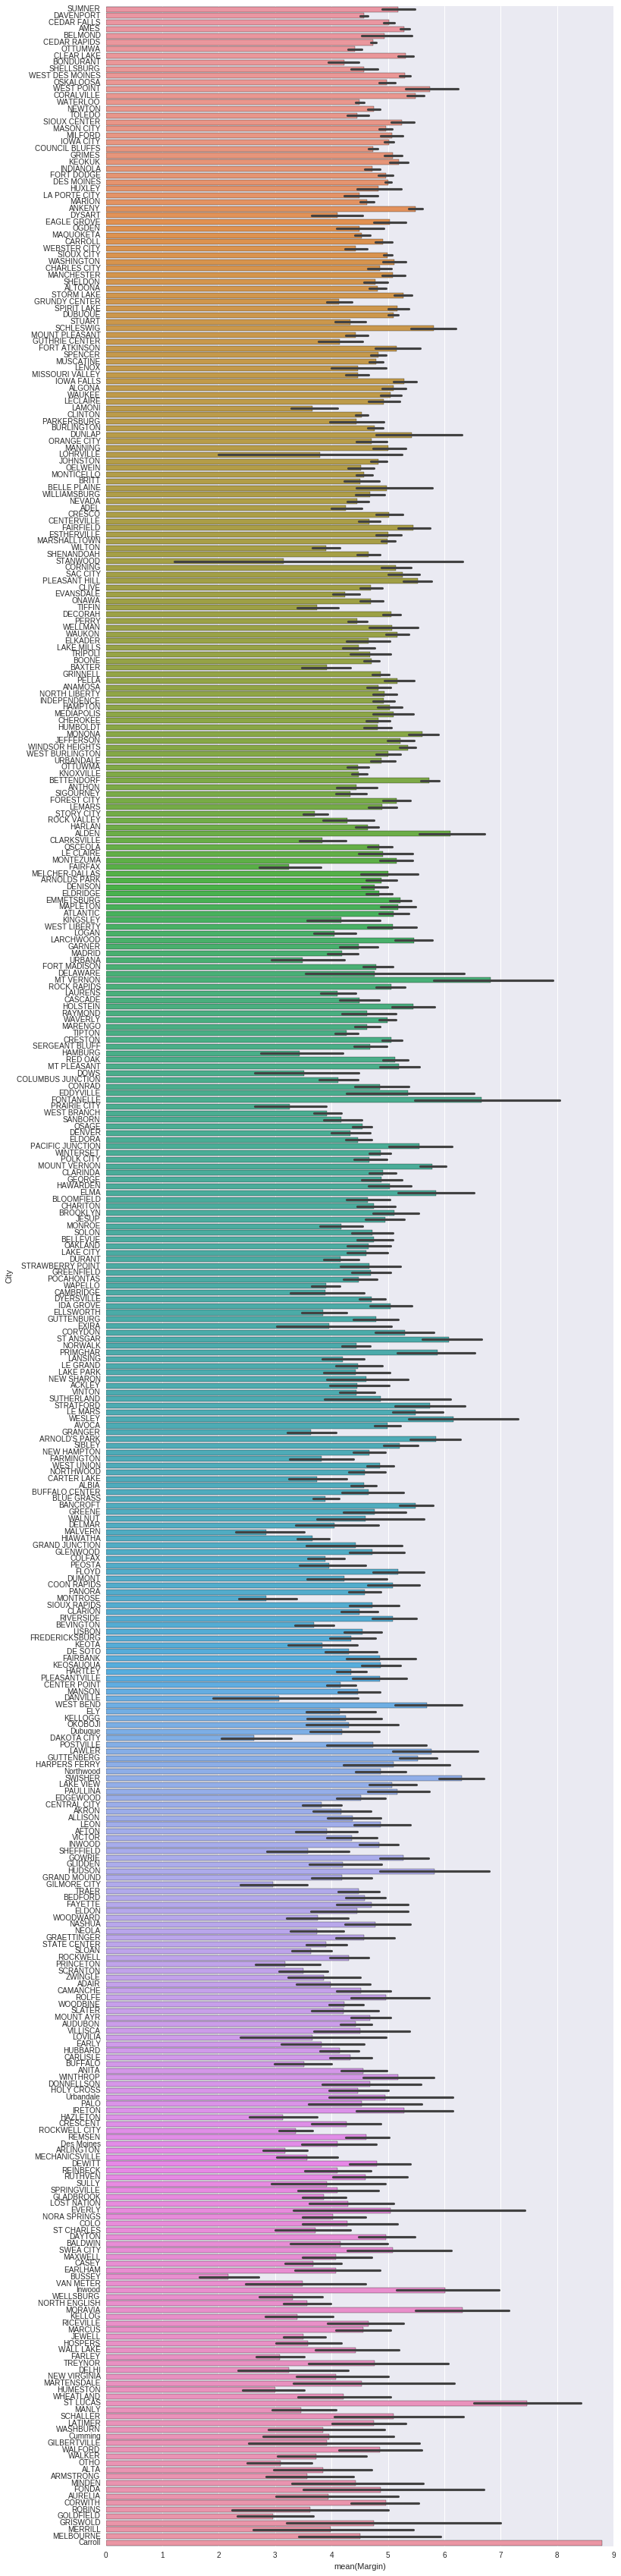

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize = (12, 60))
sns.barplot(x = 'Margin', y = 'City', data = sales)

In [38]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

df1 = bottles[['County Number', 'Bottles Sold', "Sale (Dollars)"]]
cols = ['County Number','Bottles Sold']
lr = linear_model.LinearRegression()

x = df3[cols]
y = df3['Sale (Dollars)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [39]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
pred = lr.predict(x_test)
actual = y_test

In [41]:
lr.score(x_test, y_test)

0.056103928001972947

In [42]:
lr.score(x_train, y_train)

0.093989779077773061

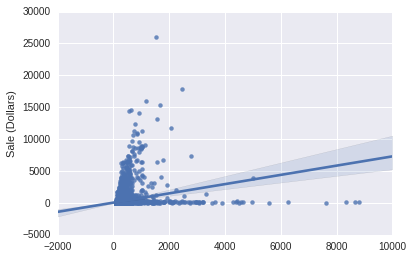

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.regplot(x=pred,y=actual)